<a href="https://colab.research.google.com/github/vsquitiro/finalProjectCAP4770/blob/master/Copy_of_DecisionTreePlayground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
fileURL = 'https://cap4770dsprojectsum.s3.amazonaws.com/creditcard.csv'

In [ ]:
print('Can you see this?')

Can you see this?


In [ ]:
print('2nd change')

2nd change


In [ ]:
import pandas as pd
import s3fs

df = pd.read_csv('https://cap4770dsprojectsum.s3.amazonaws.com/creditcard.csv')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

column_names = []
for name in df.columns:
  column_names.append(name)

x = df.values
x_scaled = min_max.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns = column_names

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,0.252484,0.680908,0.371591,0.635591,0.446084,0.434392,0.737173,0.655066,0.594863,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,0.381188,0.744342,0.486190,0.641219,0.383840,0.464105,0.727794,0.640681,0.551930,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,0.322422,0.706683,0.503854,0.640473,0.511697,0.357443,0.763381,0.644945,0.386683,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,0.271817,0.710910,0.487635,0.636372,0.289124,0.415653,0.711253,0.788492,0.467058,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,0.236355,0.724477,0.552509,0.608406,0.349419,0.434995,0.724243,0.650665,0.626060,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,0.598850,0.190550,0.806406,0.394978,0.801627,0.267218,0.484577,0.789000,0.688412,0.509985,0.595979,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030,0.0
284803,0.999971,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,0.488530,0.276355,0.738709,0.542361,0.623352,0.423414,0.426717,0.730383,0.569303,0.442620,0.580900,0.564933,0.553153,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965,0.0
284804,0.999977,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,0.498692,0.309763,0.706572,0.434111,0.628885,0.435700,0.453827,0.740239,0.680504,0.518236,0.580280,0.565220,0.537005,0.664877,0.468492,0.592824,0.411177,0.416593,0.312585,0.002642,0.0
284805,0.999977,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,0.500464,0.170288,0.667901,0.367667,0.661171,0.483042,0.429998,0.745946,0.729908,0.789612,0.581622,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389,0.0


In [ ]:
#Test set will be same for all models
import numpy as np
from sklearn.model_selection import train_test_split
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [ ]:
test = np.unique(y_train, return_counts=True)
test[0][1]/test[1][0]

4.396705987873885e-06

In [ ]:
test = np.unique(y_test, return_counts=True)
test[0][1]/test[1][0]

1.758334505556337e-05

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_train_under, y_train_under = nm.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from collections import Counter
print(Counter(y_train_under))

Counter({0.0: 402, 1.0: 402})


In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)
print(Counter(y_train_over))

Counter({0.0: 227443, 1.0: 227443})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import time

In [ ]:
# Decision Tree for set without over/undersampling
t0 = time.time()
model_normal = DecisionTreeClassifier().fit(X_train,y_train)
t1 = time.time()
time_normal = t1 - t0

In [ ]:
# Calculate accuracy for model without over/undersampling
model_normal.score(X_test, y_test)

0.9991924440855307

In [ ]:
from sklearn.metrics import confusion_matrix
# Generate confusion matrix for model without over/undersampling
preds_normal = model_normal.predict(X_test)
confusion_matrix(y_test, preds_normal)

array([[56847,    25],
       [   21,    69]])

In [ ]:
from sklearn.metrics import precision_score
# Calculate precision score for model without over/undersampling
precision_score(y_test, preds_normal)

0.7340425531914894

In [ ]:
from sklearn.metrics import recall_score
# Calculate recall score for model without over/undersampling
recall_score(y_test, preds_normal)

0.7666666666666667

In [ ]:
from sklearn.metrics import f1_score
# Calculate F1 Score for model without over/undersampling
f1_score(y_test, preds_normal)

0.75

In [ ]:
from sklearn.metrics import roc_auc_score
# Calculate ROC area under curve for model without over/undersampling
roc_auc_score(y_test, preds_normal)

0.8831135415201388

In [ ]:
from sklearn.metrics import classification_report
# Generate classification report for model without over/undersampling
classification_report(y_test, preds_normal, output_dict=True)

{'0.0': {'f1-score': 0.9995955688412169,
  'precision': 0.9996307237813885,
  'recall': 0.9995604163736109,
  'support': 56872},
 '1.0': {'f1-score': 0.75,
  'precision': 0.7340425531914894,
  'recall': 0.7666666666666667,
  'support': 90},
 'accuracy': 0.9991924440855307,
 'macro avg': {'f1-score': 0.8747977844206085,
  'precision': 0.866836638486439,
  'recall': 0.8831135415201388,
  'support': 56962},
 'weighted avg': {'f1-score': 0.9992012076671761,
  'precision': 0.9992110942853545,
  'recall': 0.9991924440855307,
  'support': 56962}}

In [ ]:
import matplotlib.pyplot as plt

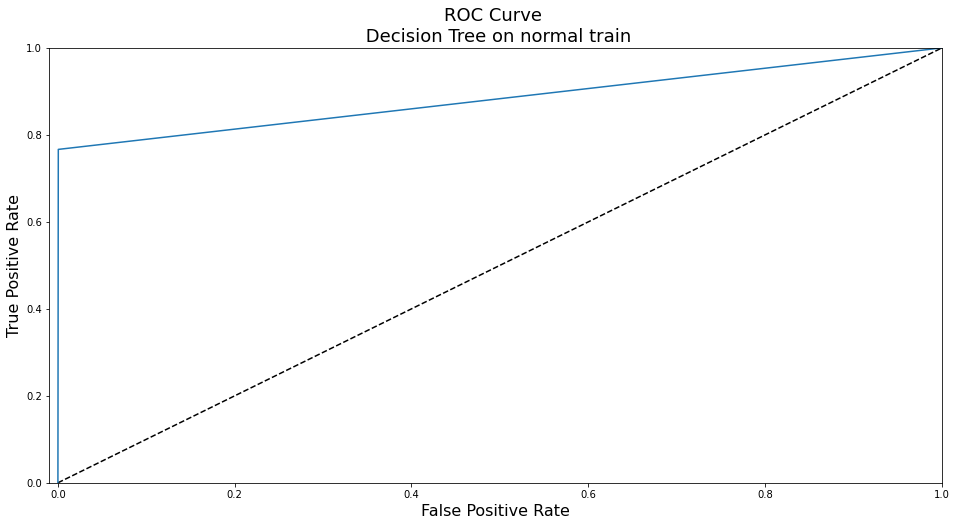

In [ ]:
# Generate ROC Curve for model without over/undersampling
import sklearn.metrics as metrics
plt.figure(figsize=(16,8))
plt.title('ROC Curve \n Decision Tree on normal train', fontsize=18)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
fpr, tpr, threshold = metrics.roc_curve(y_test, preds_normal)
plt.plot(fpr, tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, preds_normal)))

In [ ]:
# Decision Tree for set with oversampling
t0 = time.time()
model_over = DecisionTreeClassifier().fit(X_train_over,y_train_over)
t1 = time.time()
time_over = t1 - t0

In [ ]:
# Calculate accuracy for model with oversampling
model_over.score(X_test, y_test)

0.9991573329588147

In [ ]:
# Generate confusion matrix for model with oversampling
preds_over = model_over.predict(X_test)
confusion_matrix(y_test, preds_over)

array([[56850,    22],
       [   26,    64]])

In [ ]:
# Calculate precision score for model with oversampling
precision_score(y_test, preds_over)

0.7441860465116279

In [ ]:
# Calculate recall score for model with oversampling
recall_score(y_test, preds_over)

0.7111111111111111

In [ ]:
# Calculate F1 Score for model with oversampling
f1_score(y_test, preds_over)

0.7272727272727273

In [ ]:
# Calculate ROC area under curve for model with oversampling
roc_auc_score(y_test, preds_over)

0.8553621387599445

In [ ]:
# Generate classification report for model with oversampling
classification_report(y_test, preds_over, output_dict=True)

{'0.0': {'f1-score': 0.9995780145584977,
  'precision': 0.9995428651803925,
  'recall': 0.9996131664087776,
  'support': 56872},
 '1.0': {'f1-score': 0.7272727272727273,
  'precision': 0.7441860465116279,
  'recall': 0.7111111111111111,
  'support': 90},
 'accuracy': 0.9991573329588147,
 'macro avg': {'f1-score': 0.8634253709156126,
  'precision': 0.8718644558460102,
  'recall': 0.8553621387599444,
  'support': 56962},
 'weighted avg': {'f1-score': 0.9991477720133672,
  'precision': 0.9991394012275785,
  'recall': 0.9991573329588147,
  'support': 56962}}

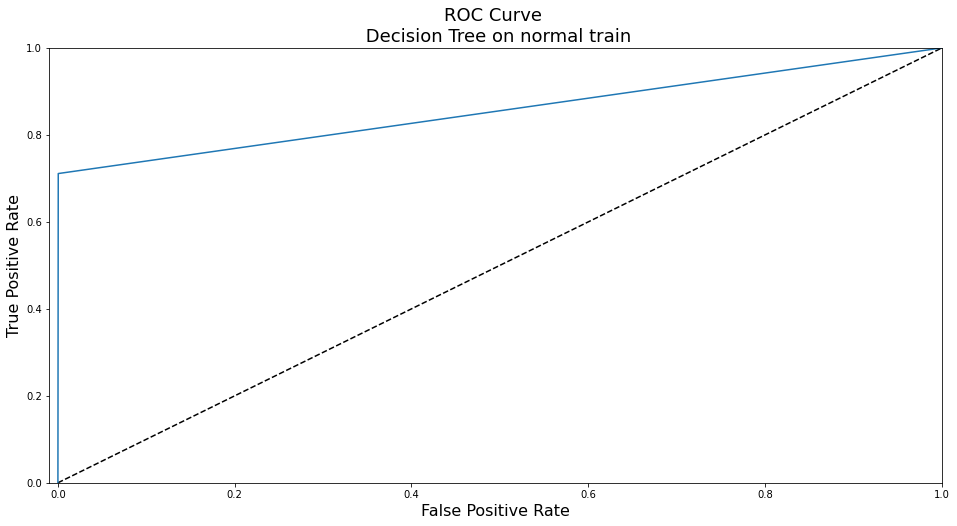

In [ ]:
# Generate ROC Curve for model with oversampling
import sklearn.metrics as metrics
plt.figure(figsize=(16,8))
plt.title('ROC Curve \n Decision Tree on normal train', fontsize=18)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
fpr, tpr, threshold = metrics.roc_curve(y_test, preds_over)
plt.plot(fpr, tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, preds_over)))

In [ ]:
# Decision Tree for set with undersampling
t0 = time.time()
model_under = DecisionTreeClassifier().fit(X_train_under,y_train_under)
t1 = time.time()
time_under = t1 - t0

In [ ]:
# Calculate accuracy for model with undersampling
model_under.score(X_test, y_test)

0.3599943822197254

In [ ]:
# Generate confusion matrix for model with undersampling
preds_under = model_under.predict(X_test)
confusion_matrix(y_test, preds_under)

array([[20421, 36451],
       [    5,    85]])

In [ ]:
# Calculate precision score for model with undersampling
precision_score(y_test, preds_under)

0.002326472520253996

In [ ]:
# Calculate recall score for model with undersampling
recall_score(y_test, preds_under)

0.9444444444444444

In [ ]:
# Calculate F1 Score for model with undersampling
f1_score(y_test, preds_under)

0.004641511494566701

In [ ]:
# Calculate ROC area under curve for model with undersampling
roc_auc_score(y_test, preds_under)

0.651756966912052

In [ ]:
# Generate classification report for model with undersampling
classification_report(y_test, preds_under, output_dict=True)

{'0.0': {'f1-score': 0.5283707211053326,
  'precision': 0.9997552139430138,
  'recall': 0.3590694893796596,
  'support': 56872},
 '1.0': {'f1-score': 0.004641511494566701,
  'precision': 0.002326472520253996,
  'recall': 0.9444444444444444,
  'support': 90},
 'accuracy': 0.3599943822197254,
 'macro avg': {'f1-score': 0.26650611629994964,
  'precision': 0.5010408432316339,
  'recall': 0.651756966912052,
  'support': 56962},
 'weighted avg': {'f1-score': 0.527543228586373,
  'precision': 0.998179275831149,
  'recall': 0.3599943822197254,
  'support': 56962}}

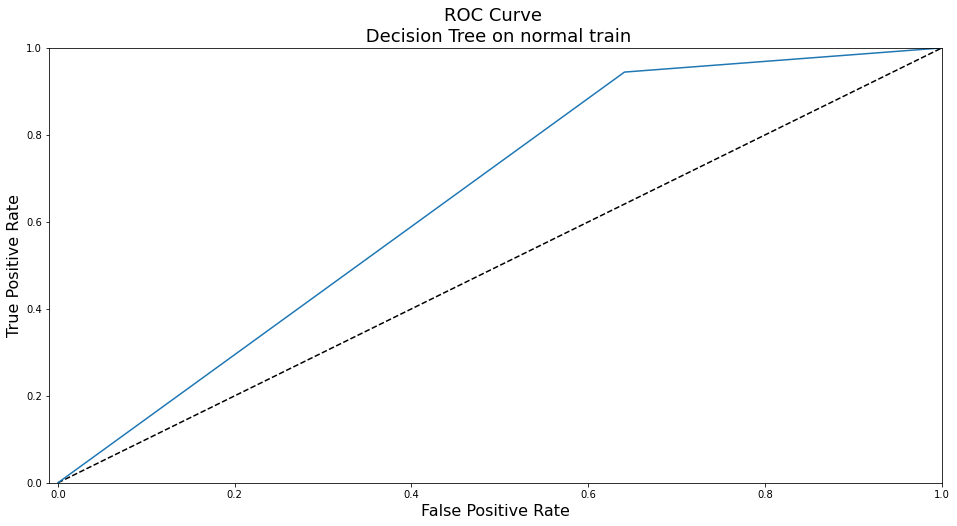

In [ ]:
# Generate ROC Curve for model with undersampling
import sklearn.metrics as metrics
plt.figure(figsize=(16,8))
plt.title('ROC Curve \n Decision Tree on normal train', fontsize=18)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
fpr, tpr, threshold = metrics.roc_curve(y_test, preds_under)
plt.plot(fpr, tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, preds_under)))

In [ ]:
results_normal = classification_report(y_test, preds_normal, output_dict=True)
results_over = classification_report(y_test, preds_over, output_dict=True)
results_under = classification_report(y_test, preds_under, output_dict=True)

In [ ]:
results = {
    'labels':['normal','oversampling','undersampling'],
    'accuracy': [results_normal['accuracy'], results_over['accuracy'], results_under['accuracy']],
    'sensitivity':[results_normal['1.0']['recall'], results_over['1.0']['recall'], results_under['1.0']['recall']],
    'specificity':[results_normal['0.0']['recall'], results_over['0.0']['recall'], results_under['0.0']['recall']],
    'f_score':[results_normal['1.0']['f1-score'], results_over['1.0']['f1-score'], results_under['1.0']['f1-score']],
    'roc_auc':[roc_auc_score(y_test, preds_normal),roc_auc_score(y_test, preds_over),roc_auc_score(y_test, preds_under)],
    'time':[time_normal, time_over, time_under]}

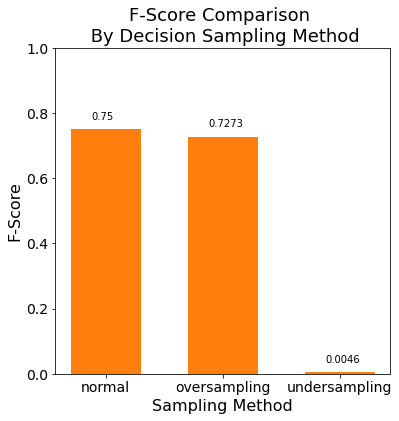

In [ ]:
test = 'f_score'
plt.figure(figsize=(6,6))
title = 'F-Score Comparison \n By Decision Sampling Method'
plt.title(title, fontsize=18)
plt.axis(ymin=0, ymax=1)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Sampling Method', fontsize=16)
plt.ylabel('F-Score', fontsize=16)
plt.bar(results['labels'],results[test],0.6)
bars = plt.bar(results['labels'],results[test],0.6)
for bar in bars:
    yval = bar.get_height()
    yval_label = round(yval,4)
    plt.text(bar.get_x()+0.18, yval + .03, yval_label)

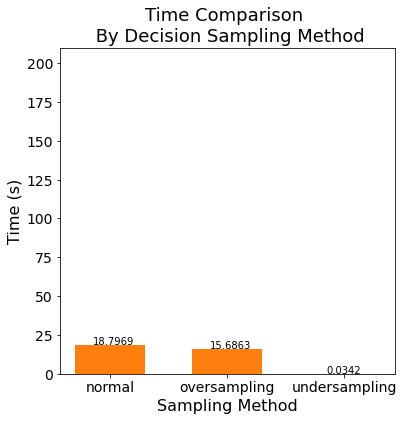

In [215]:
test = 'time'
plt.figure(figsize=(6,6))
title = 'Time Comparison \n By Decision Sampling Method'
plt.title(title, fontsize=18)
plt.axis(ymin=0, ymax=210)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Sampling Method', fontsize=16)
plt.ylabel('Time (s)', fontsize=16)
plt.bar(results['labels'],results[test],0.6)
bars = plt.bar(results['labels'],results[test],0.6)
for bar in bars:
    yval = bar.get_height()
    yval_label = round(yval,4)
    plt.text(bar.get_x()+0.15, yval + .2, yval_label)

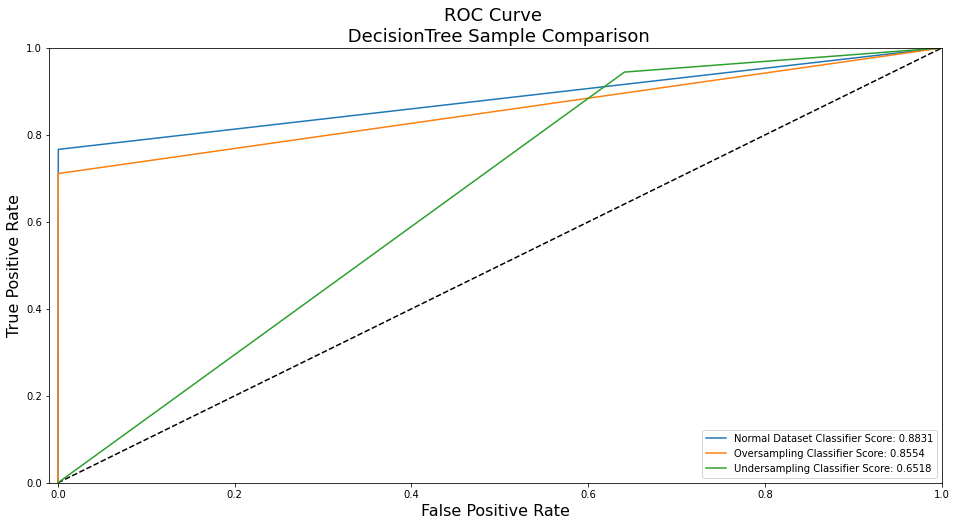

In [ ]:
# Generate ROC Curve for model with undersampling
import sklearn.metrics as metrics
plt.figure(figsize=(16,8))
plt.title('ROC Curve \n DecisionTree Sample Comparison', fontsize=18)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
fpr_normal, tpr_normal, threshold_normal = metrics.roc_curve(y_test, preds_normal)
fpr_over, tpr_over, threshold_over = metrics.roc_curve(y_test, preds_over)
fpr_under, tpr_under, threshold_under = metrics.roc_curve(y_test, preds_under)
plt.plot(fpr_normal, tpr_normal, label='Normal Dataset Classifier Score: {:.4f}'.format(roc_auc_score(y_test, preds_normal)))
plt.plot(fpr_over, tpr_over, label='Oversampling Classifier Score: {:.4f}'.format(roc_auc_score(y_test, preds_over)))
plt.plot(fpr_under, tpr_under, label='Undersampling Classifier Score: {:.4f}'.format(roc_auc_score(y_test, preds_under)))
plt.legend(loc="lower right")